# WeatherPy


Observations:
1. In the Northern Hemisphere, the higher the latitude shows a negative coorleation to the temperature. This makes sense as the closer you get to the north pole, the colder it gets. Since the southern hemisphere has negative values, there is a positive coorleation between the two, although it is not as strong as it is in the north. 

2. Humidity, cloudiness and wind speed did not display a coorelation to the latitude values. This suggests that these factors are not very location dependent. 

3. The number of values for the Northern Hemisphere from this particular data request was 381 and for the Southern one it was only 177. This makes the southern data more limited for drawing conclutions. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) - ASK GRETEL THIS 
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build a URL for the OWM API, include a units variable and your API Key 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create the variables needed for the data you are interested in
cities = cities

counter = 0
temp = []
lat = []
lon = []
hum = []
cloud = []
wind = []
city_list = []
date =[]
country = []

# Make a loop for each city you will be looking for, appened your empty list for the info you will gather
# Make sure to include an expection for pulled cities that might not show up from CityPy to OWM

for city in cities:
    response = requests.get(query_url + city).json()  
    counter += 1
    
    try:
        city_list.append(city)
        date.append(response['dt'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing request for: {counter}, {city}")

    except (KeyError):
        city_list.remove(city)
        print("Missing field/result... skipping.")
        pass

Processing request for: 1, del rio
Processing request for: 2, adrar
Processing request for: 3, omboue
Processing request for: 4, amapa
Processing request for: 5, mbini
Processing request for: 6, faanui
Missing field/result... skipping.
Processing request for: 8, rikitea
Processing request for: 9, barrow
Processing request for: 10, ushuaia
Processing request for: 11, nara
Processing request for: 12, punta arenas
Processing request for: 13, port alfred
Processing request for: 14, mogadishu
Processing request for: 15, kapaa
Processing request for: 16, somotillo
Processing request for: 17, kawalu
Processing request for: 18, aguimes
Processing request for: 19, butaritari
Processing request for: 20, alta floresta
Processing request for: 21, provideniya
Processing request for: 22, mataura
Processing request for: 23, vaini
Processing request for: 24, jamestown
Processing request for: 25, san patricio
Processing request for: 26, torbay
Processing request for: 27, henties bay
Processing request 

Processing request for: 220, meulaboh
Missing field/result... skipping.
Processing request for: 222, birnin kebbi
Processing request for: 223, bredasdorp
Processing request for: 224, nome
Processing request for: 225, ponta delgada
Missing field/result... skipping.
Processing request for: 227, hay river
Processing request for: 228, tarko-sale
Processing request for: 229, geraldton
Processing request for: 230, shingu
Processing request for: 231, humberto de campos
Processing request for: 232, iquitos
Processing request for: 233, ponta do sol
Processing request for: 234, zhicheng
Processing request for: 235, verkh-suetka
Processing request for: 236, sturgis
Processing request for: 237, rio gallegos
Processing request for: 238, pisco
Processing request for: 239, cockburn town
Processing request for: 240, khatanga
Processing request for: 241, sharanga
Processing request for: 242, asau
Processing request for: 243, caravelas
Processing request for: 244, birjand
Processing request for: 245, fl

Processing request for: 437, kisangani
Processing request for: 438, tanete
Processing request for: 439, ust-ishim
Processing request for: 440, haines junction
Processing request for: 441, vanavara
Processing request for: 442, college
Processing request for: 443, teguajinal
Processing request for: 444, snizhne
Processing request for: 445, tulle
Processing request for: 446, murbad
Processing request for: 447, bonthe
Missing field/result... skipping.
Processing request for: 449, walvis bay
Processing request for: 450, manggar
Missing field/result... skipping.
Processing request for: 452, kidal
Processing request for: 453, alofi
Processing request for: 454, mackay
Processing request for: 455, pangoa
Processing request for: 456, zaysan
Processing request for: 457, imbituba
Processing request for: 458, sovetskiy
Processing request for: 459, ostrovnoy
Processing request for: 460, pak phanang
Processing request for: 461, yuxia
Missing field/result... skipping.
Processing request for: 463, vilh

In [4]:
# Making sure all the columns have an even amount of data to avoid future errors
print(len(city_list), len(date), len(country), len(temp), len(lat), len(lon), len(hum), len(cloud), len(wind))

554 554 554 554 554 554 554 554 554


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# New DataFrame that will hold all the requests from the API 
weather_dict = {
    "city": city_list,
    "country":country,
    "date": date,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "hum": hum,
    "clouds": cloud,
    "wind": wind
    
}
city_data = pd.DataFrame(weather_dict)
city_data.head()

,city,country,date,lat,lon,temp,hum,clouds,wind
0,del rio,US,1600308042,29.36,-100.90,83.68,48,1,4.70
1,adrar,MR,1600308042,20.50,-10.07,94.60,14,0,6.04
2,omboue,GA,1600308042,-1.57,9.26,74.50,86,100,9.26
3,amapa,BR,1600308042,1.00,-52.00,74.97,85,0,4.81
4,mbini,GQ,1600308042,1.57,9.61,76.15,87,96,6.82


In [6]:
# Output to a CSV file so you don't have to make multiple requests from the API 
city_data.to_csv("../output_data/city_data.csv")

In [7]:
# CSV file ready to be read and random column deleted 
city_df = pd.read_csv("../output_data/city_data.csv")
city_df.keys()
del city_df['Unnamed: 0']
city_df["date"] = pd.to_datetime(city_df['date'], unit='s')
city_df.head()

,city,country,date,lat,lon,temp,hum,clouds,wind
0,del rio,US,2020-09-17 02:00:42,29.36,-100.90,83.68,48,1,4.70
1,adrar,MR,2020-09-17 02:00:42,20.50,-10.07,94.60,14,0,6.04
2,omboue,GA,2020-09-17 02:00:42,-1.57,9.26,74.50,86,100,9.26
3,amapa,BR,2020-09-17 02:00:42,1.00,-52.00,74.97,85,0,4.81
4,mbini,GQ,2020-09-17 02:00:42,1.57,9.61,76.15,87,96,6.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

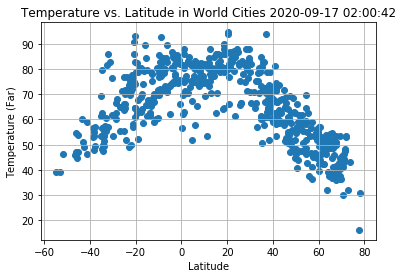

In [8]:
# Scatter Plots 
date = city_df.iloc[3,2]

plt.scatter(city_df["lat"], city_df["temp"], marker="o")

# Incorporate the other graph properties 
plt.title(f'Temperature vs. Latitude in World Cities' + " " + str(date) )
plt.ylabel("Temperature (Far)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

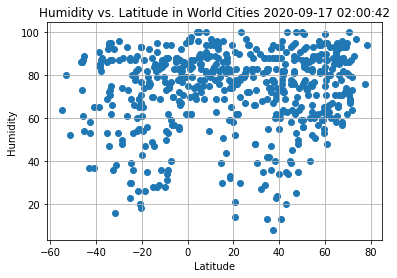

In [9]:
plt.scatter(city_df["lat"], city_df["hum"], marker="o")

# Humidity Plot 
plt.title("Humidity vs. Latitude in World Cities" + " " + str(date))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

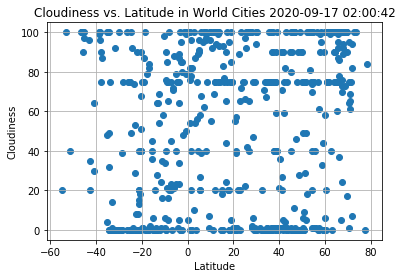

In [10]:
plt.scatter(city_df["lat"], city_df["clouds"], marker="o")

# Cloudiness Scatter Plot 
plt.title("Cloudiness vs. Latitude in World Cities" +  " " + str(date))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

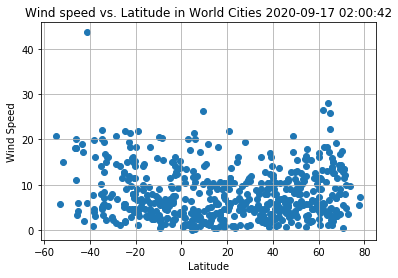

In [11]:
plt.scatter(city_df["lat"], city_df["wind"], marker="o")

# Wind speed scatter plot 
plt.title("Wind speed vs. Latitude in World Cities" +  " " + str(date))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression (x_axis, y_axis, title, xlabel, ylabel):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.tight_layout()
    plt.show()
    
    print(f"The r-squared is: {rvalue**2}")

    return 

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[city_df["lat"] >=0]
north_df

,city,country,date,lat,lon,temp,hum,clouds,wind
0,del rio,US,2020-09-17 02:00:42,29.36,-100.90,83.68,48,1,4.70
1,adrar,MR,2020-09-17 02:00:42,20.50,-10.07,94.60,14,0,6.04
3,amapa,BR,2020-09-17 02:00:42,1.00,-52.00,74.97,85,0,4.81
4,mbini,GQ,2020-09-17 02:00:42,1.57,9.61,76.15,87,96,6.82
7,barrow,US,2020-09-17 02:00:43,71.29,-156.79,48.20,87,75,8.05
...,...,...,...,...,...,...,...,...,...
546,ternate,ID,2020-09-17 02:01:58,0.80,127.40,81.63,70,76,3.78
547,hammerfest,NO,2020-09-17 02:01:58,70.66,23.68,41.00,86,75,12.75
548,pueblo nuevo,MX,2020-09-17 02:01:59,23.38,-105.38,61.57,100,100,0.40
550,zhangye,CN,2020-09-17 02:01:59,38.93,100.45,66.88,24,0,6.20


In [14]:
south_df = city_df.loc[city_df["lat"] <=0]
south_df

,city,country,date,lat,lon,temp,hum,clouds,wind
2,omboue,GA,2020-09-17 02:00:42,-1.57,9.26,74.50,86,100,9.26
5,faanui,PF,2020-09-17 02:00:42,-16.48,-151.75,79.05,76,2,14.54
6,rikitea,PF,2020-09-17 02:00:43,-23.12,-134.97,73.53,79,29,11.88
8,ushuaia,AR,2020-09-17 02:00:43,-54.80,-68.30,39.20,64,20,20.80
10,punta arenas,CL,2020-09-17 01:58:48,-53.15,-70.92,39.09,80,100,5.82
...,...,...,...,...,...,...,...,...,...
530,gweru,ZW,2020-09-17 02:01:56,-19.45,29.82,62.56,54,1,6.55
542,mareeba,AU,2020-09-17 02:01:58,-17.00,145.43,73.98,76,82,10.00
549,maceio,BR,2020-09-17 02:01:36,-9.67,-35.74,69.80,88,40,3.36
551,kainantu,PG,2020-09-17 02:01:59,-6.29,145.87,71.96,70,72,6.04


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

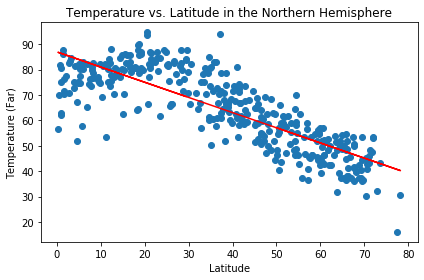

The r-squared is: 0.6700625794493335


In [15]:
regression(north_df["lat"], north_df["temp"],"Temperature vs. Latitude in the Northern Hemisphere","Latitude","Temperature (Far)")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

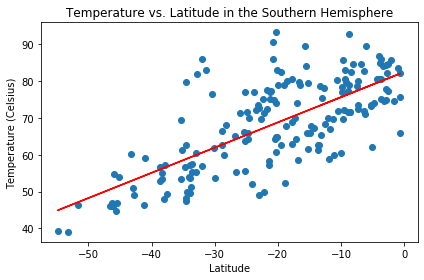

The r-squared is: 0.5286659210592154


In [16]:
regression(south_df["lat"], south_df["temp"],"Temperature vs. Latitude in the Southern Hemisphere","Latitude","Temperature (Celsius)")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

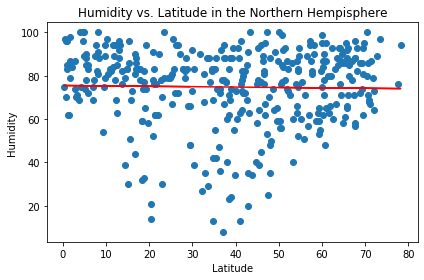

The r-squared is: 0.0004508783354737485


In [17]:
regression(north_df["lat"], north_df["hum"],"Humidity vs. Latitude in the Northern Hempisphere", "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

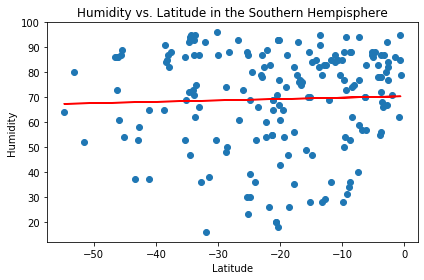

The r-squared is: 0.0012854944218913247


In [18]:
regression(south_df["lat"], south_df["hum"],"Humidity vs. Latitude in the Southern Hempisphere", "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

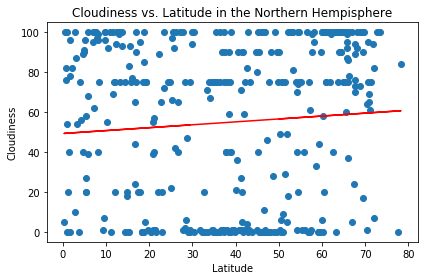

The r-squared is: 0.005897673287862362


In [19]:
regression(north_df["lat"], north_df["clouds"],"Cloudiness vs. Latitude in the Northern Hempisphere", "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

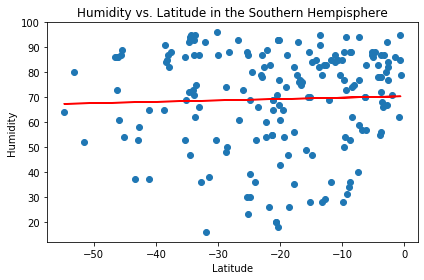

The r-squared is: 0.0012854944218913247


In [20]:
regression(south_df["lat"], south_df["hum"],"Humidity vs. Latitude in the Southern Hempisphere", "Latitude", "Humidity")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

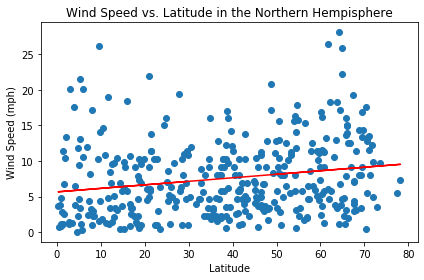

The r-squared is: 0.03862713749563524


In [21]:
regression(north_df["lat"], north_df["wind"],"Wind Speed vs. Latitude in the Northern Hempisphere", "Latitude", "Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

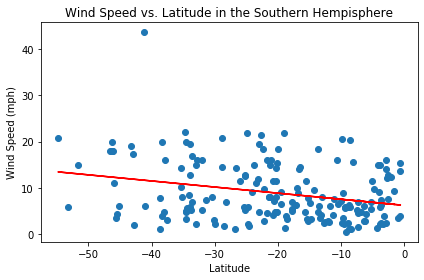

The r-squared is: 0.07478131392569545


In [22]:
regression(south_df["lat"], south_df["wind"],"Wind Speed vs. Latitude in the Southern Hempisphere", "Latitude", "Wind Speed (mph)")